In [101]:
# Data Wrangling
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
df = pd.read_csv('/Users/youqizheng/Documents/CISC151/Assignments/Assignment 3/Assignment 3 attached files Mar 19, 2020 1026 AM/Regression_Dset.csv')
df.describe()

,Feature1,Feature2,Feature3,Feature4
count,100.000000,100.000000,100.000000,100.000000
mean,0.540543,0.675886,0.656680,0.946034
std,0.284134,0.303618,0.288093,0.599146
...,...,...,...,...
50%,0.551250,0.684550,0.659650,0.833450
75%,0.750450,0.915300,0.904700,1.291875
max,0.997700,1.183500,1.228600,2.214500


The Pearson Correlation coefficient is 0.9713636968153045 the P-value is 5.624441928610212e-63


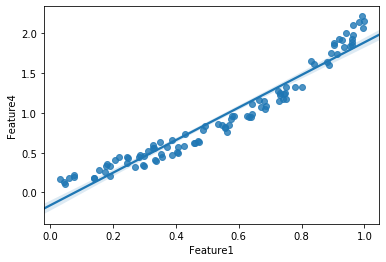

In [102]:
# Data Exploration
sns.regplot(x = 'Feature1', y = 'Feature4', data = df)
pearson_coef, p_value = stats.pearsonr(df_1['Feature1'], df_1['Feature4'])
print("The Pearson Correlation coefficient is", pearson_coef, "the P-value is", p_value)

# 1.

In [103]:
# (a) Run simple linear regression to predict y from x. 
# Report the linear model you found. Predict the value of y for new x values 0.3, 0.5, and 0.8.
from sklearn.linear_model import LinearRegression

# Defining X and y
X = df_1[['Feature1']]
y = df['Feature4']
slr = LinearRegression()
slr.fit(X,y)
print("Report:\n The intercept (b0) is:", slr.intercept_, " and the coefficient (b1) is:", slr.coef_)

# Predicting
new_X = pd.DataFrame([0.3, 0.5, 0.8])
print("The new predicted values are:", slr.predict(new_X))
 

Report:
 The intercept (b0) is: -0.16115435525701827  and the coefficient (b1) is: [2.04828914]
The new predicted values are: [0.45333239 0.86299021 1.47747695]


Report:
 The new intercept is: -0.15461612992060636  coefficient: [2.03924549]
The estimated average r-square is  0.9390188243653638


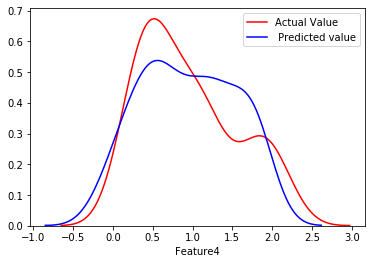

In [104]:
# (b) Use cross-validation to predict generalization error. Describe your methodology.
# Since the SLR from above was an in-sample evaluation, it's generalization error will be high.
# By splitting the data and using cross-validation, we can minimize the generalization error and predict it using its
# estimated average r-square score. 
from sklearn.model_selection import train_test_split 

# Train by splitting 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)
slr_split = LinearRegression()
slr_split.fit(X_train, y_train)
print("Report:\n The new intercept is:", slr_split.intercept_, " coefficient:", slr_split.coef_)

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
# Cross-Validation with KFOLD method
scores = cross_val_score(slr_split,X, y, cv = 5 )
print("The estimated average r-square is ",np.mean(scores))
y_CrossPredict = cross_val_predict(slr_split, X, y, cv = 5)
ax1 = sns.distplot(y, hist = False, color = 'r', label = "Actual Value")
sns.distplot(y_CrossPredict, hist = False, color = 'b', label = " Predicted value", ax = ax1)


In [105]:
# (c) On the same data, run polynomial regression for p = 2; 3; 4; and 5. 
# Report polynomial models for each. 
# With each of these models, predict the value of y for x values of 0.3, for 0.5, and for 0.8.
from sklearn.preprocessing import PolynomialFeatures

from sklearn.preprocessing import PolynomialFeatures
# Predictions for different degrees of p
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)
print("For 2 degrees:", pol_reg.predict(poly_reg.fit_transform([[0.3], [0.5], [0.8]])))
print("The intercept (b0) is:", pol_reg.intercept_, " and the coefficient (b1) is:", pol_reg.coef_)

poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)
print("For 3 degrees:", pol_reg.predict(poly_reg.fit_transform([[0.3], [0.5], [0.8]])))
print("The intercept (b0) is:", pol_reg.intercept_, " and the coefficient (b1) is:", pol_reg.coef_)

poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)
print("For 4 degrees:", pol_reg.predict(poly_reg.fit_transform([[0.3], [0.5], [0.8]])))
print("The intercept (b0) is:", pol_reg.intercept_, " and the coefficient (b1) is:", pol_reg.coef_)

poly_reg = PolynomialFeatures(degree=5)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)
print("For 5 degrees:", pol_reg.predict(poly_reg.fit_transform([[0.3], [0.5], [0.8]])))
print("The intercept (b0) is:", pol_reg.intercept_, " and the coefficient (b1) is:", pol_reg.coef_)

For 2 degrees: [0.41935934 0.73387631 1.45387635]
The intercept (b0) is: 0.1958084636126145  and the coefficient (b1) is: [0.         0.24872042 1.65483055]
For 3 degrees: [0.44781255 0.73684673 1.42299721]
The intercept (b0) is: 0.0941615794595746  and the coefficient (b1) is: [ 0.          1.23490955 -0.61865718  1.43915739]
For 4 degrees: [0.44741953 0.73775077 1.42195828]
The intercept (b0) is: 0.09765278013538192  and the coefficient (b1) is: [ 0.          1.17706286 -0.37614888  1.07694812  0.1757643 ]
For 5 degrees: [0.44792417 0.73796781 1.42244813]
The intercept (b0) is: 0.10403259858404257  and the coefficient (b1) is: [ 0.          1.02845533  0.54447293 -1.20924531  2.63094607 -0.95005287]


[0.0052468092155772425, 0.004877158764973469, 0.005121408833395064, 0.0051823644306665554]


,Validation Error
Degree,
2,0.005247
3,0.004877
4,0.005121
5,0.005182


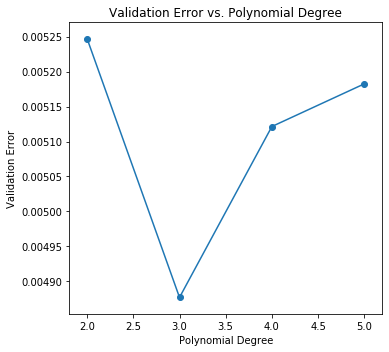

In [106]:
# (d) Cross-validate to choose the best model. Describe how you did this.

# To find the best model, I will perform a cross validation to find the model with the least validation error
# and find the best Bias-Variance Tradeoff between the 4 models above. 
from sklearn.preprocessing import PolynomialFeatures
transformers = [PolynomialFeatures(degree=deg)
                for deg in range(2, 6)]
X_train_polys = [transformer.fit_transform(X_train)
                 for transformer in transformers]
from sklearn.model_selection import KFold

def mse_cost(y_pred, y_actual):
    return np.mean((y_pred - y_actual) ** 2)

def compute_CV_error(model, X_train, Y_train):
    kf = KFold(n_splits=5)
    validation_errors = []
    
    for train_idx, valid_idx in kf.split(X_train):
        # split the data
        split_X_train, split_X_valid = X_train[train_idx], X_train[valid_idx]
        split_Y_train, split_Y_valid = Y_train.iloc[train_idx], Y_train.iloc[valid_idx]

        # Fit the model on the training split
        model.fit(split_X_train,split_Y_train)
        
        # Compute the RMSE on the validation split
        error = mse_cost(split_Y_valid,model.predict(split_X_valid))
        
        validation_errors.append(error)
    
    #average validation errors
    return np.mean(validation_errors)

cross_validation_errors = [compute_CV_error(LinearRegression(fit_intercept=False), X_train_poly, y_train)
                     for X_train_poly in X_train_polys]
print(cross_validation_errors)

cv_df = pd.DataFrame({'Validation Error': cross_validation_errors}, index=range(2, 6))
cv_df.index.name = 'Degree'
pd.options.display.max_rows = 20
display(cv_df)
pd.options.display.max_rows = 7

plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.plot(cv_df.index, cv_df['Validation Error'])
plt.scatter(cv_df.index, cv_df['Validation Error'])
plt.title('Validation Error vs. Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Validation Error');

plt.tight_layout();


In [107]:
# (d) Continued...
best_trans = transformers[1]
best_model = LinearRegression(fit_intercept=False).fit(X_train_polys[1], y_train)

training_error = mse_cost(best_model.predict(X_train_polys[1]), y_train)
validation_error = cross_validation_errors[1]
test_error = mse_cost(best_model.predict(best_trans.transform(X_test)), y_test)

print('Degree 3 polynomial')
print(f'  Training error: {training_error:0.5f}')
print(f'Validation error: {validation_error:0.5f}')
print(f'      Test error: {test_error:0.5f}')
print("Since polynomial degree 3 generates the least generalization error, I will choose model #3.")

Degree 3 polynomial
  Training error: 0.00440
Validation error: 0.00488
      Test error: 0.00744
Since polynomial degree 3 generates the least generalization error, I will choose model #3.


# 2.  Now use Features 1,2, and 3 of the dataset as predictors and let Feature4 be the dependent variable y.

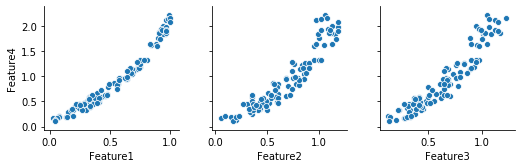

In [108]:
sns.pairplot(df, x_vars = ['Feature1','Feature2','Feature3'], y_vars = 'Feature4')

In [142]:
# (a) Run linear regression and predict the value of y for new (x1,x2,x3) values (0.3; 0.4; 0.1), 
# for (0.5; 0.2; 0.4), and for (0.8; 0.2; 0.7).


# Fitting the model
mlr_X = df[['Feature1', 'Feature2', 'Feature3']]
mlr_y = df['Feature4']

mlr = LinearRegression()
mlr.fit(mlr_X, mlr_y)

# Predictions
new_mlr = [[0.3, 0.4, 0.1], [0.5, 0.2, 0.4], [0.8, 0.2, 0.7]]
print("The new predicted values are:", mlr.predict(new_mlr))
print("Model intercept:", mlr.intercept_)
print("Model coefficient", mlr.coef_)


The new predicted values are: [0.43963273 0.97488992 1.68039533]
Model intercept: -0.13603217690879954
Model coefficient [ 2.28501601 -0.2912669   0.06666868]


[0.022020053635138315, 0.006853312698773146, 0.006338295511977096, 0.009369771362171191, 0.07525052267588672, 4.8605223785013765]


,Validation Error
Degree,
1,0.022020
2,0.006853
3,0.006338
4,0.009370
5,0.075251
6,4.860522


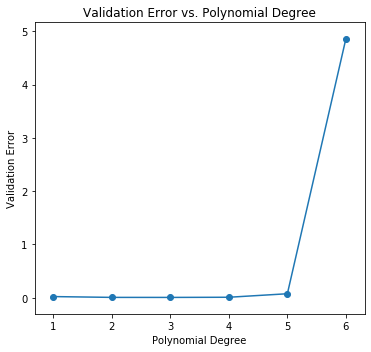

In [139]:
# (b) Regularize your model to avoid over-fitting and apply polynomial regression. 
# Use cross-validation to choose the best hyperparameter value (e.g., alpha) to build your model.

# Regularizing model for best parameter and finding best model
transformers = [PolynomialFeatures(degree=deg)
                for deg in range(1, 7)]
X_train_polys = [transformer.fit_transform(mlr_X)
                 for transformer in transformers]
from sklearn.model_selection import KFold

def mse_cost(y_pred, y_actual):
    return np.mean((y_pred - y_actual) ** 2)

def compute_CV_error(mlr, mlr_X, mlr_y):
    kf = KFold(n_splits=10)
    validation_errors = []
    
    for train_idx, valid_idx in kf.split(mlr_X):
        # split the data
        split_X_train, split_X_valid = mlr_X[train_idx], mlr_X[valid_idx]
        split_Y_train, split_Y_valid = mlr_y.iloc[train_idx], mlr_y.iloc[valid_idx]

        # Fit the model on the training split
        mlr.fit(split_X_train,split_Y_train)
        
        # Compute the RMSE on the validation split
        error = mse_cost(split_Y_valid,mlr.predict(split_X_valid))
        
        validation_errors.append(error)
    
    #average validation errors
    return np.mean(validation_errors)

cross_validation_errors = [compute_CV_error(LinearRegression(fit_intercept=False), X_train_poly, mlr_y)
                     for X_train_poly in X_train_polys]
print(cross_validation_errors)

cv_df = pd.DataFrame({'Validation Error': cross_validation_errors}, index=range(1, 7))
cv_df.index.name = 'Degree'
pd.options.display.max_rows = 20
display(cv_df)
pd.options.display.max_rows = 7

plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.plot(cv_df.index, cv_df['Validation Error'])
plt.scatter(cv_df.index, cv_df['Validation Error'])
plt.title('Validation Error vs. Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Validation Error');

plt.tight_layout();






In [144]:
# (b) continued..
# choosing order 
poly = PolynomialFeatures(4)

# convert to be used further to linear regression
X_transform = poly.fit_transform(X_train)

# fit this to Linear Regressor
mlr.fit(X_transform,y_train) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)